In [84]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [85]:
from sklearn.datasets import load_breast_cancer

In [86]:
cancer = load_breast_cancer()

x = cancer["data"]
y = cancer["target"]

In [87]:
x.shape, y.shape

((569, 30), (569,))

In [88]:
#Step 1 Data centering
column_size = x.shape[1]
x_center = x.copy()

for i in range(column_size):
    column_mean = x_center[:, i].mean()
    x_center[:, i] -= column_mean

x_center[:,0].mean()


-4.995028019403165e-16

In [89]:
#Step 2 Scale the data

'''
Scale the data by using formula (data - means) / stds
here the mean is already 0, we just have to calculate standard deviation
'''
x_center /= np.std(x_center, axis=0)
x_center[0:5, 0:5]

array([[ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633],
       [ 1.82982061, -0.35363241,  1.68595471,  1.90870825, -0.82696245],
       [ 1.57988811,  0.45618695,  1.56650313,  1.55888363,  0.94221044],
       [-0.76890929,  0.25373211, -0.59268717, -0.76446379,  3.28355348],
       [ 1.75029663, -1.15181643,  1.77657315,  1.82622928,  0.28037183]])

In [90]:
# Now we will use Singular Value Decomposition 

# A = U Sigma V.T

import numpy.linalg as la 


In [91]:
U, S, Vt = la.svd(x_center)

In [92]:
print(U)
print(U.shape)

[[-0.10574701 -0.03424167 -0.02804925 ...  0.00539255 -0.10867361
   0.05272771]
 [-0.02746735  0.06621658 -0.01321823 ...  0.07560838  0.11113416
   0.09596562]
 [-0.06595814  0.0188936  -0.013779   ... -0.03942513  0.04166326
  -0.02634132]
 ...
 [-0.01445008  0.0334283   0.01405328 ...  0.9764312  -0.0037216
   0.0082425 ]
 [-0.1193433  -0.02938157 -0.04687576 ...  0.00243499  0.89349591
  -0.01481303]
 [ 0.0629828   0.01178483  0.0372214  ...  0.00587618 -0.01194484
   0.87925784]]
(569, 569)


In [93]:
print(Vt)
print(Vt.T.shape)

[[-2.18902444e-01 -1.03724578e-01 -2.27537293e-01 -2.20994985e-01
  -1.42589694e-01 -2.39285354e-01 -2.58400481e-01 -2.60853758e-01
  -1.38166959e-01 -6.43633464e-02 -2.05978776e-01 -1.74280281e-02
  -2.11325916e-01 -2.02869635e-01 -1.45314521e-02 -1.70393451e-01
  -1.53589790e-01 -1.83417397e-01 -4.24984216e-02 -1.02568322e-01
  -2.27996634e-01 -1.04469325e-01 -2.36639681e-01 -2.24870533e-01
  -1.27952561e-01 -2.10095880e-01 -2.28767533e-01 -2.50885971e-01
  -1.22904556e-01 -1.31783943e-01]
 [ 2.33857132e-01  5.97060883e-02  2.15181361e-01  2.31076711e-01
  -1.86113023e-01 -1.51891610e-01 -6.01653628e-02  3.47675005e-02
  -1.90348770e-01 -3.66575471e-01  1.05552152e-01 -8.99796818e-02
   8.94572342e-02  1.52292628e-01 -2.04430453e-01 -2.32715896e-01
  -1.97207283e-01 -1.30321560e-01 -1.83848000e-01 -2.80092027e-01
   2.19866379e-01  4.54672983e-02  1.99878428e-01  2.19351858e-01
  -1.72304352e-01 -1.43593173e-01 -9.79641143e-02  8.25723507e-03
  -1.41883349e-01 -2.75339469e-01]
 [-8.5

In [94]:
print(S)
print(S.shape)

[86.93235745 56.90677266 40.04263937 33.57058877 30.62887007 26.2104161
 19.60102663 16.46800391 15.4017255  14.12602481 12.93205441 12.19019359
 11.71889139  9.4519063   7.31866075  6.74106325  5.81360925  5.47175363
  5.30591648  4.21066503  4.12971871  3.95133143  3.72155031  3.20519874
  2.96796958  2.15709923  1.98150547  0.95096438  0.65273958  0.27514088]
(30,)


In [96]:
# We want to reduce the dimension of the dataset, and we only use the most  
# k principal directions, i.e. the first k columns of V. In the case k = 2 or number 
# of principle components = 2

pca = x_center @ Vt[0:2,:].T


In [104]:
pca = 0 - pca

pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

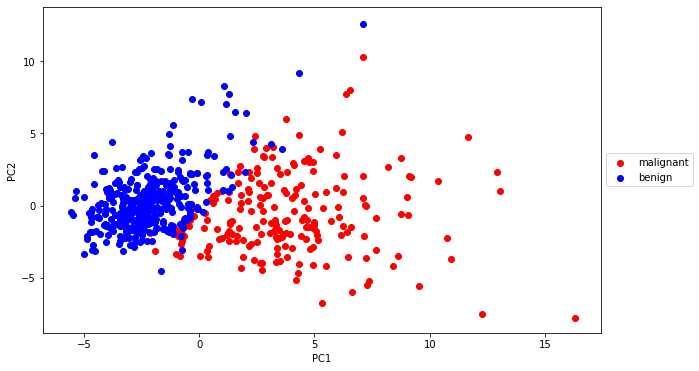

In [105]:
plt.figure(figsize=(10, 6))
for target, color, label in zip(np.unique(cancer['target']), ['red', 'blue'], cancer['target_names']):
    plt.scatter(pca[cancer['target'] == target, 0], 
                pca[cancer['target'] == target, 1], 
                c=color, 
                label=label)

# Add labels and legend
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

